In [61]:
import gym
# import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [68]:
car_position_space = np.linspace(-1.2, 0.6, 20)
velocity_space = np.linspace(-0.07, 0.07, 20)
action_space = np.linspace(-1, 1, 20)

def get_state(obs):
    position, velocity = obs
    position_bin = np.digitize(position, car_position_space)
    velocity_bin = np.digitize(velocity, velocity_space)

    return (position_bin, velocity_bin)

def max_action(Q, state, actions = action_space):
    values = np.array([Q[state,a] for a in actions])
#     print("VALUES", values)
    return action_space[np.argmax(values)]

In [69]:
env = gym.make('MountainCarContinuous-v0')
env.reset()
alpha = 0.1
gamma = 0.99
eps = 1.0
states = []
for pos in range(51):
    for vel in range(51):
#         print(pos,vel)
        states.append((pos, vel))
# print(states)
Q = {}
for state in states :
    for action in action_space:
        Q[state, action] = -1
        
# Q[(),0]
# Q


epsode 100 score -38.00747922437678 epsilon %.3f 0.9800000000000022
epsode 200 score -35.68725761772854 epsilon %.3f 0.9600000000000044
epsode 300 score -32.42963988919677 epsilon %.3f 0.9400000000000066
epsode 400 score -34.9426592797785 epsilon %.3f 0.9200000000000088
epsode 500 score -35.51218836565108 epsilon %.3f 0.900000000000011
epsode 600 score -32.85734072022168 epsilon %.3f 0.8800000000000132
epsode 700 score -31.4612188365652 epsilon %.3f 0.8600000000000154
epsode 800 score -31.26177285318567 epsilon %.3f 0.8400000000000176
epsode 900 score -28.62465373961221 epsilon %.3f 0.8200000000000198
epsode 1000 score -29.75263157894738 epsilon %.3f 0.800000000000022
epsode 1100 score -28.832963988919666 epsilon %.3f 0.7800000000000242
epsode 1200 score -27.57645429362884 epsilon %.3f 0.7600000000000264
epsode 1300 score -27.669529085872565 epsilon %.3f 0.7400000000000286
epsode 1400 score -29.54653739612189 epsilon %.3f 0.7200000000000308
epsode 1500 score -25.940997229916896 epsilon

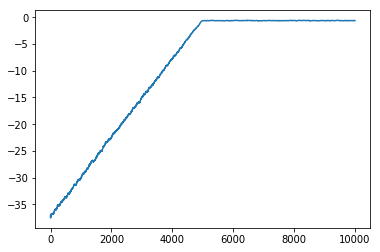

In [70]:
n_games = 10000

t_rewards = np.zeros(n_games)
# env._max_episode_steps = 1000
score = 0

for i in range(n_games):
    done = False     
    obs = env.reset()
    state = get_state(obs)
    if i%100 == 0 and i > 0: print('epsode', i, 'score', score, 'epsilon %.3f', eps)
    score = 0
    while not done:
        action = np.random.choice(action_space) if np.random.random() < eps else max_action(Q, state)
#         print("ACTION", action)
        obs_, reward, done, info = env.step([action])
        state_ = get_state(obs_)
#         print("STATE", state_)
        score+=reward
        action_ = max_action(Q, state_)
#         print("ACTION", action_)
#         print(action_)
        Q[state, action] = Q[state,action] + alpha*(reward + gamma*Q[state_,action_] - Q[state,action])
        state = state_
    
    t_rewards[i] = score
    eps = eps -2/n_games if eps>0.01 else 0.01
mean_rewards = np.zeros(n_games)
for t in range(n_games):
    mean_rewards[t] = np.mean(t_rewards[max(0,t-50):(t+1)])
plt.plot(mean_rewards)